In [1]:
#kmeans基本步骤：
#1、随机初始化k个中心点
#2、计算所有点到k个中心点的距离，确定各个点的所属类别
#3、对各个簇进行求均值，更新中心点
#4、重复迭代至停止条件：1、迭代次数到了2、均方误差mse小于某域值3、簇中心点变化率很小

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def my_kmeans(points,kNum,iterNum = 100):
    centers_list = get_k_centers(points,kNum)
    for idx in range(iterNum):
        distances = get_whole_distance(points,centers_list)
        labels = get_labels(distances)
        center_points_dict = get_center_points(labels,points,centers_list)
        if idx < iterNum-1:
            centers_list = update_centers_list(center_points_dict)
    return centers_list,center_points_dict
    
def get_k_centers(points,kNum):
    res = []
    for idx in range(kNum):
        random = np.random.randint(0,len(points))
        while points[random] in set(res):
            random = np.random.randint(0,len(points))
        res.append(points[random])
    return res

def get_whole_distance(points,centers_list):
    weight = len(centers_list)
    height = len(points)
    distance = np.zeros((height,weight))
    for row in range(height):
        for column in range(weight):
            pointA = points[row]
            pointB = centers_list[column]
            distance[row,column] = get_distance(pointA,pointB)
    return distance
            
def get_distance(pointA,pointB):
    return np.sqrt(np.sum(np.square(np.subtract(pointA,pointB))))

def get_labels(distances):
    rows,columns = distances.shape
    labels = []
    for row in range(rows):
        idx = np.argmin(distances[row])
        labels.append(idx)
    return labels

def get_center_points(labels,points,centers_list):
    center_points = {}
    for idx in range(len(labels)):
        center = centers_list[labels[idx]]
        point = points[idx]
        if center not in center_points:
            center_points[center] = []
        center_points[center].append(point)
    return center_points
            
def update_centers_list(center_points_dict):
    centers_list = []
    for points in center_points_dict.values():
        points = np.array(points)
        centers_list.append((np.mean(points[:,0]),np.mean(points[:,1])))
    return centers_list

In [4]:
def get_random_points(point_num):
    points = []
    for idx in range(point_num):
        x = np.random.randint(0,100)
        y = np.random.randint(0,100)
        point = (x,y)
        points.append(point)
    return points

In [5]:
point_num = 100
points = get_random_points(point_num)
centers_list,center_points_dict = my_kmeans(points,kNum=4,iterNum=100)

In [6]:
print(centers_list)
print(center_points_dict)

[(16.44, 75.24), (22.318181818181817, 18.681818181818183), (77.76, 76.48), (69.0, 27.107142857142858)]
{(16.44, 75.24): [(4, 88), (21, 61), (26, 75), (45, 65), (1, 79), (22, 88), (32, 88), (5, 65), (6, 76), (9, 72), (0, 47), (7, 70), (21, 69), (29, 92), (29, 58), (6, 82), (41, 80), (17, 87), (5, 92), (4, 98), (11, 48), (33, 74), (4, 95), (7, 47), (26, 85)], (22.318181818181817, 18.681818181818183): [(3, 15), (27, 2), (12, 24), (27, 37), (14, 14), (45, 1), (20, 26), (16, 7), (6, 30), (20, 46), (43, 4), (14, 28), (37, 1), (29, 17), (12, 17), (46, 11), (13, 17), (31, 41), (22, 42), (20, 6), (7, 0), (27, 25)], (77.76, 76.48): [(50, 60), (95, 53), (86, 91), (98, 82), (48, 89), (95, 92), (75, 94), (70, 83), (53, 97), (85, 65), (90, 77), (86, 57), (68, 80), (85, 86), (55, 90), (89, 82), (94, 89), (88, 52), (78, 55), (85, 63), (64, 69), (81, 70), (84, 79), (85, 86), (57, 71)], (69.0, 27.107142857142858): [(98, 29), (49, 49), (68, 0), (50, 37), (68, 20), (62, 32), (47, 54), (70, 44), (55, 42), 

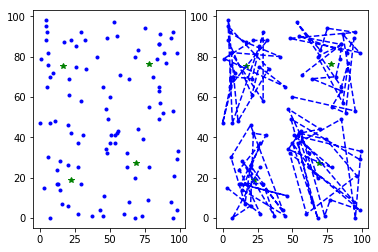

In [7]:
plt.subplot(1,2,1)
for center,points in center_points_dict.items():
    center_x,center_y = center
    plt.plot(center_x,center_y,"g*")
    points = np.array(points)
    x_s,y_s = points[:,0],points[:,1]
    plt.plot(x_s,y_s,"b.")
    
plt.subplot(1,2,2)
for center,points in center_points_dict.items():
    center_x,center_y = center
    plt.plot(center_x,center_y,"g*")
    points = np.array(points)
    x_s,y_s = points[:,0],points[:,1]
    plt.plot(x_s,y_s,"b.--")
    
plt.show()